# Introduction

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm

## Env

In [2]:
env = gym.make('Taxi-v3')

## Constants

In [3]:
num_states = env.observation_space.n
num_actions = env.action_space.n  # number of actions plus options

GAMMA = 0.99
ALPHA = 0.2
EPSILON = 0.1

actions = ["south", "north", "east", "west", "pickup", "dropoff"]
color = ["red", "green", "blue", "yellow", "taxi"]
positions = [(0, 4), (4, 4), (3, 0), (0, 0)]

## Options

In [4]:
def epsilon_greedy(Q, state):
    if np.random.uniform(0, 1) < EPSILON:
        return np.random.choice(Q.shape[1])
    else:
        return np.argmax(Q[state])

In [5]:
# Does epsilon greedy on the state actions values until it reaches a colored state.

def Red(env, state, Q):
    optact = None
    optdone = False
    x, y, pos, dest = env.unwrapped.decode(state)
    if (x, y) == positions[0]:
        optdone = True
        optact = 4
    else:
        optact = epsilon_greedy(Q[:, :num_actions], state)
    return optact,optdone
def Green(env, state, Q):
    optact = None
    optdone = False
    x, y, pos, dest = env.unwrapped.decode(state)
    if (x, y) == positions[1]:
        optdone = True
        optact = 4
    else:
        optact = epsilon_greedy(Q[:, :num_actions], state)
    return optact,optdone
def Blue(env, state, Q):
    optact = None
    optdone = False
    x, y, pos, dest = env.unwrapped.decode(state)
    if (x, y) == positions[2]:
        optdone = True
        optact = 4
    else:
        optact = epsilon_greedy(Q[:, :num_actions], state)
    return optact,optdone
def Yellow(env, state, Q):
    optact = None
    optdone = False
    x, y, pos, dest = env.unwrapped.decode(state)
    if (x, y) == positions[3]:
        optdone = True
        optact = 4
    else:
        optact = epsilon_greedy(Q[:, :num_actions], state)
    return optact,optdone

        

In [6]:
options = [Red, Green, Blue, Yellow]

## SMDP

In [15]:
Q_SMDP = np.zeros((num_states, num_actions + 4))
fre_SMDP = np.zeros((num_states, num_actions + 4))
reward_scores = []
for i_episode in tqdm(range(1000)):
    state, _ = env.reset()
    done = False
    score = 0
    while not done:
        action = epsilon_greedy(Q_SMDP, state)

        if action < num_actions:
            next_state, reward, done, _, _ = env.step(action)
            score += reward
            Q_SMDP[state][action] += ALPHA * (reward + GAMMA * np.max(Q_SMDP[next_state]) - Q_SMDP[state][action])
            fre_SMDP[state][action] += 1
            state = next_state


        else:
            Option = options[action - num_actions]
            optdone = False
            tau = 0
            reward_bar = 0
            while not optdone and tau < 1000 :
                tau += 1
                optact,optdone = Option(env, state, Q_SMDP)
                next_state, reward, done, _, _ = env.step(optact)
                reward_bar = reward_bar*GAMMA + reward
                score += reward
                Q_SMDP[state][action] += ALPHA * (reward_bar + GAMMA**tau * np.max(Q_SMDP[next_state]) - Q_SMDP[state][action])
                fre_SMDP[state][action] += 1
                optact,optdone = Option(env, next_state, Q_SMDP)
                state = next_state
    reward_scores.append(score)


100%|██████████| 1000/1000 [03:09<00:00,  5.27it/s]


In [16]:
def plot_state_visits(state_visits,message="Update Frequency Heatmap"):
    plt.figure(figsize=(10,10))
    plt.title(message)
    plt.pcolor(state_visits, edgecolors='k', linewidths=2)
    plt.colorbar()
    for i in range(state_visits.shape[0]):
        for j in range(state_visits.shape[1]):
            plt.annotate(str(round(state_visits[i][j])), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        xytext = (j+0.5, i+0.5))
    plt.show()

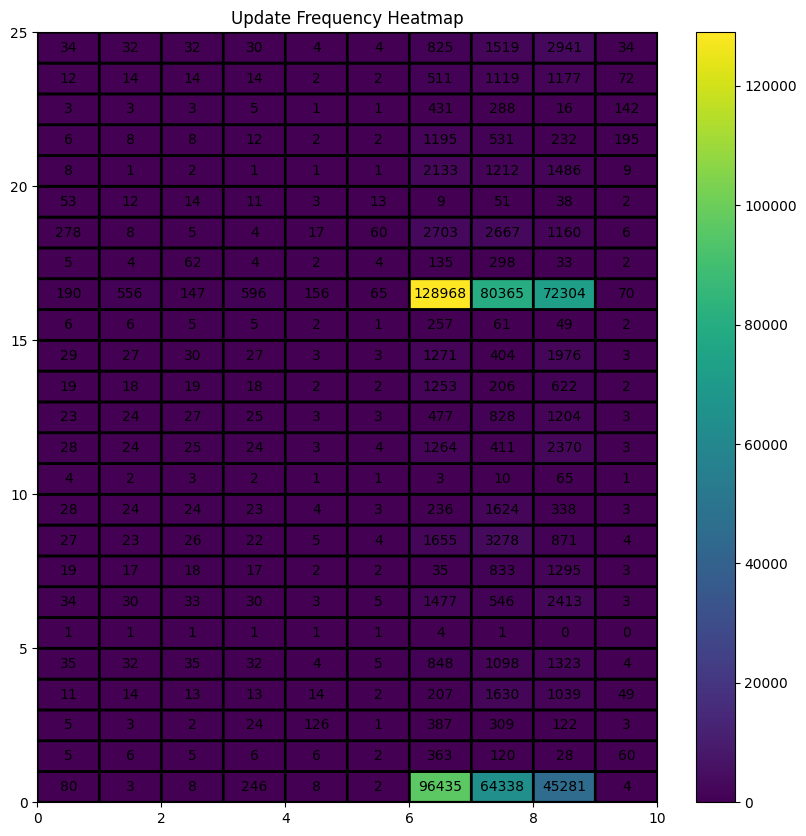

In [21]:
plot_state_visits(fre_SMDP[:25])